# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# FINAL CODE FOR CITIES PULL

# List for holding lat_lngs and cities
lat_lngs = []
samplecities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in samplecities:
        samplecities.append(city)

# Print the city count to confirm sufficient count
len(samplecities)

618

In [3]:
# #CODE FOR TESTING

# # List for holding lat_lngs and cities
# lat_lngs = []
# samplecities = []

# # Create a set of random lat and lng combinations
# lats = np.random.uniform(lat_range[0], lat_range[1], size=75)
# lngs = np.random.uniform(lng_range[0], lng_range[1], size=75)
# lat_lngs = zip(lats, lngs)

# # Identify nearest city for each lat, lng combination
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#     # If the city is unique, then add it to a our cities list
#     if city not in samplecities:
#         samplecities.append(city)

# # Print the city count to confirm sufficient count
# len(samplecities)

62

In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

lat = []
lng = []
temp_max = []
humidity = []
clouds = []
windspeed = []
country = []
date = []
cities = []

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
print("Beggining Data Retrieval")
print("------------------------")

recordcount = 0
setcount = 1

for city in samplecities:
        
    # Try to grab the data for each city in sample set if they are available in the Open Weather API
    try:     
        query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
        response = requests.get(query_url).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cities.append(response['name'])
        if recordcount < 50:
            recordcount = recordcount + 1
        else:
            setcount = setcount + 1
            recordcount = 0
        time.sleep(1.01)
        print(f"Processing Record of {recordcount} Set {setcount} | {city}")
        
    # Handle exceptions for a character that is not available in the Star Wars API
    except:
        # Append null values
        print("City not found. Skipping...")
        pass

Beggining Data Retrieval
------------------------
Processing Record of 1 Set 1 | port alfred
City not found. Skipping...
Processing Record of 2 Set 1 | iranshahr
Processing Record of 3 Set 1 | saskylakh
City not found. Skipping...
Processing Record of 4 Set 1 | upernavik
Processing Record of 5 Set 1 | busselton
Processing Record of 6 Set 1 | barrow
Processing Record of 7 Set 1 | kahului
Processing Record of 8 Set 1 | luderitz
City not found. Skipping...
Processing Record of 9 Set 1 | saint-philippe
Processing Record of 10 Set 1 | yellowknife
Processing Record of 11 Set 1 | butaritari
Processing Record of 12 Set 1 | ushuaia
Processing Record of 13 Set 1 | qaanaaq
City not found. Skipping...
Processing Record of 14 Set 1 | albany
Processing Record of 15 Set 1 | shevchenkove
Processing Record of 16 Set 1 | serenje
Processing Record of 17 Set 1 | sept-iles
Processing Record of 18 Set 1 | ribeira grande
Processing Record of 19 Set 1 | punta arenas
Processing Record of 20 Set 1 | pacific gro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [116]:
cities_dict = pd.DataFrame({
    'City': cities,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': temp_max,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind Speed': windspeed,
    'Country': country,
    'Date': date
})

# Convert to DataFrame
cities_data = pd.DataFrame(cities_dict)

cities_data.to_csv('output_data/cities.csv', encoding="utf-8", index=False)
cities_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial do Cabo,-22.9661,-42.0278,84.20,74,0,8.05,BR,1616705605
1,Jamestown,42.0970,-79.2353,68.00,37,1,8.08,US,1616705891
2,Rikitea,-23.1203,-134.9692,79.54,73,61,18.41,PF,1616705845
3,Brooks,50.5834,-111.8851,32.00,69,100,12.66,CA,1616705893
4,Lavrentiya,65.5833,-171.0000,3.00,84,28,2.46,RU,1616705894


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.

# the sample size does not include any values with humidity > 100%, so cleaning the data is not necessary

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [1]:
cities_data.describe().round(2)

NameError: name 'cities_data' is not defined

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

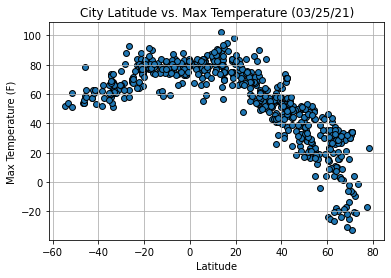

In [118]:
plt.scatter(cities_data['Lat'], cities_data['Max Temp'], marker = "o", s=35, edgecolors= 'black')

#Create the lables
plt.title("City Latitude vs. Max Temperature (03/25/21)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save image
plt.savefig("output_data/Latitude_vs_MaxTemp.png")
plt.show()

## Latitude vs. Humidity Plot

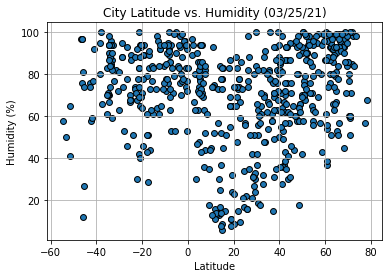

In [119]:
plt.scatter(cities_data['Lat'], cities_data['Humidity'], marker = "o", s=35, edgecolors= 'black')

#Create the lables
plt.title("City Latitude vs. Humidity (03/25/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save image
plt.savefig("output_data/Latitude_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

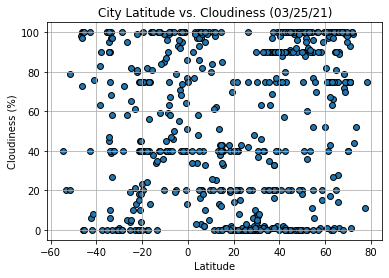

In [120]:
plt.scatter(cities_data['Lat'], cities_data['Cloudiness'], marker = "o", s=35, edgecolors= 'black')

#Create the lables
plt.title("City Latitude vs. Cloudiness (03/25/21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save image
plt.savefig("output_data/Latitude_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

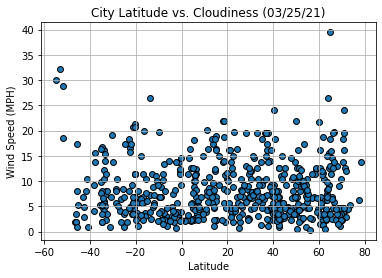

In [121]:
plt.scatter(cities_data['Lat'], cities_data['Wind Speed'], marker = "o", s=35, edgecolors= 'black')

#Create the lables
plt.title("City Latitude vs. Cloudiness (03/25/21)")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

#save image
plt.savefig("output_data/Latitude_vs_Windspeed.png")
plt.show()

## Linear Regression

In [122]:
nh_data= cities_data.loc[cities_data['Lat']>=0]
sh_data= cities_data.loc[cities_data['Lat']<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8671755674516012


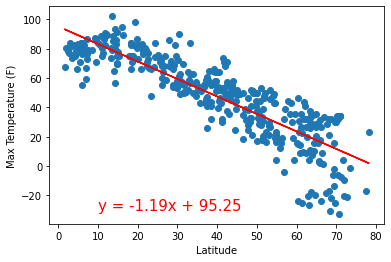

In [123]:
x_axis = nh_data['Lat']
y_axis = nh_data['Max Temp']

#used stats library to calculate the value of each
(slope, intercept, rvalue, p, std_err) = linregress(x_axis, y_axis)

# Create equation of line to calculate predicted volume at weight
fit = slope * x_axis + intercept

#print correlation between Latitude & Max Temp
# rvalue = round(rvalue,2)

print(f"The r-value is: {rvalue}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, fit, color='r')
plt.annotate(('y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))), (10, -30), fontsize=15, color='r')

# plt.title("City Latitude vs. Max Temperature Northern Hemisphere (03/25/21)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

#save image
plt.savefig("output_data/NH_Latitude_vs_MaxTemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6932869320573471


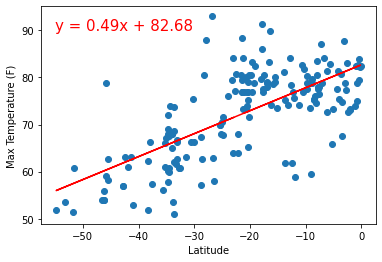

In [124]:
x_axis = sh_data['Lat']
y_axis = sh_data['Max Temp']

#used stats library to calculate the value of each
(slope, intercept, rvalue, p, std_err) = linregress(x_axis, y_axis)

# Create equation of line to calculate predicted volume at weight
fit = slope * x_axis + intercept

#print correlation between Latitude & Max Temp
# rvalue = round(rvalue,2)

print(f"The r-value is: {rvalue}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, fit, color='r')
plt.annotate(('y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))), (-55, 90), fontsize=15, color='r')

# plt.title("City Latitude vs. Max Temperature Southern Hemisphere (03/25/21)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

#save image
plt.savefig("output_data/SH_Latitude_vs_MaxTemp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.37470371455260576


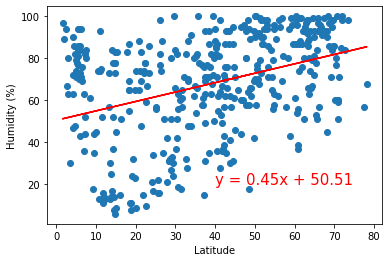

In [127]:
x_axis = nh_data['Lat']
y_axis = nh_data['Humidity']

#used stats library to calculate the value of each
(slope, intercept, rvalue, p, std_err) = linregress(x_axis, y_axis)

# Create equation of line to calculate predicted volume at weight
fit = slope * x_axis + intercept

#print correlation between Latitude & Max Temp
# rvalue = round(rvalue,2)

print(f"The r-value is: {rvalue}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, fit, color='r')
plt.annotate(('y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))), (40, 20), fontsize=15, color='r')

# plt.title("City Latitude vs. Humidity (03/25/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

#save image
plt.savefig("output_data/NH_Latitude_vs_Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1810848761145148


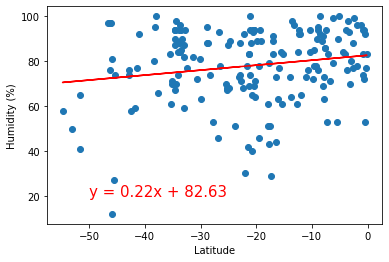

In [128]:
x_axis = sh_data['Lat']
y_axis = sh_data['Humidity']

#used stats library to calculate the value of each
(slope, intercept, rvalue, p, std_err) = linregress(x_axis, y_axis)

# Create equation of line to calculate predicted volume at weight
fit = slope * x_axis + intercept

#print correlation between Latitude & Max Temp
# rvalue = round(rvalue,2)

print(f"The r-value is: {rvalue}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, fit, color='r')
plt.annotate(('y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))), (-50, 20), fontsize=15, color='r')

# plt.title("City Latitude vs. Humidity (03/25/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

#save image
plt.savefig("output_data/SH_Latitude_vs_Humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2781144912580819


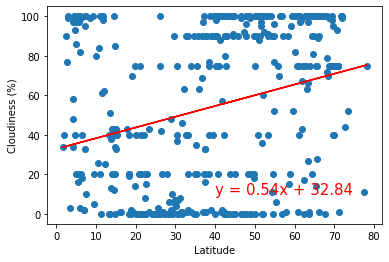

In [129]:
x_axis = nh_data['Lat']
y_axis = nh_data['Cloudiness']

#used stats library to calculate the value of each
(slope, intercept, rvalue, p, std_err) = linregress(x_axis, y_axis)

# Create equation of line to calculate predicted volume at weight
fit = slope * x_axis + intercept

#print correlation between Latitude & Max Temp
# rvalue = round(rvalue,2)

print(f"The r-value is: {rvalue}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, fit, color='r')
plt.annotate(('y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))), (40, 10), fontsize=15, color='r')

# plt.title("City Latitude vs. Cloudiness (03/25/21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

#save image
plt.savefig("output_data/NH_Latitude_vs_Cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11483954272775918


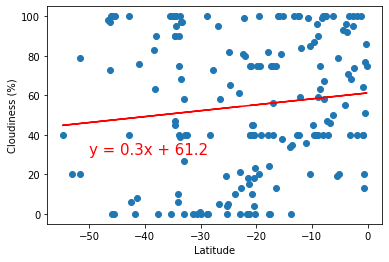

In [131]:
x_axis = sh_data['Lat']
y_axis = sh_data['Cloudiness']

#used stats library to calculate the value of each
(slope, intercept, rvalue, p, std_err) = linregress(x_axis, y_axis)

# Create equation of line to calculate predicted volume at weight
fit = slope * x_axis + intercept

#print correlation between Latitude & Max Temp
# rvalue = round(rvalue,2)

print(f"The r-value is: {rvalue}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, fit, color='r')
plt.annotate(('y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))), (-50, 30), fontsize=15, color='r')

# plt.title("City Latitude vs. Cloudiness (03/25/21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

#save image
plt.savefig("output_data/SH_Latitude_vs_Cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.007154559277149274


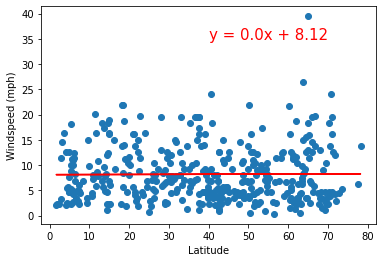

In [133]:
x_axis = nh_data['Lat']
y_axis = nh_data['Wind Speed']

#used stats library to calculate the value of each
(slope, intercept, rvalue, p, std_err) = linregress(x_axis, y_axis)

# Create equation of line to calculate predicted volume at weight
fit = slope * x_axis + intercept

#print correlation between Latitude & Max Temp
# rvalue = round(rvalue,2)

print(f"The r-value is: {rvalue}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, fit, color='r')
plt.annotate(('y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))), (40, 35), fontsize=15, color='r')

# plt.title("City Latitude vs. Wind Speed (03/25/21)")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")

#save image
plt.savefig("output_data/NH_Latitude_vs_Windspeed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.22513393720365554


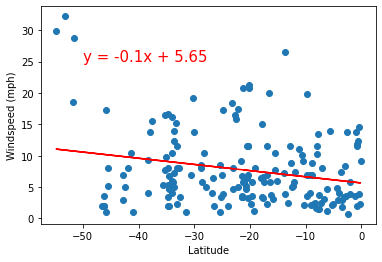

In [135]:
x_axis = sh_data['Lat']
y_axis = sh_data['Wind Speed']

#used stats library to calculate the value of each
(slope, intercept, rvalue, p, std_err) = linregress(x_axis, y_axis)

# Create equation of line to calculate predicted volume at weight
fit = slope * x_axis + intercept

#print correlation between Latitude & Max Temp
# rvalue = round(rvalue,2)

print(f"The r-value is: {rvalue}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, fit, color='r')
plt.annotate(('y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))), (-50, 25), fontsize=15, color='r')

# plt.title("City Latitude vs. Wind Speed (03/25/21)")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")

#save image
plt.savefig("output_data/SH_Latitude_vs_Windspeed.png")
plt.show()